<a href="https://colab.research.google.com/github/pedrocostab/Data_Science_Ciclistas/blob/main/Projeto_1_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1 de IF697 - Introdução a Ciência de Dados


*   Alunos: André Valença e Pedro Basílio
*   Professor: Luciano Barbosa
*   Documentação: https://github.com/ProfLuciano/cd/blob/gh-pages/slides/projeto1.pdf



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.neighbors import LocalOutlierFactor
%matplotlib inline

# 1. Coleta de dados

In [7]:
# Importando database do site da Associação Metropolitana de Ciclistas do Recife - AMECICLO

from urllib.request import urlopen
import json
url = "https://raw.githubusercontent.com/Ameciclo/perfil_do_ciclista/master/src/seed/seed.json"
response = urlopen(url)
data_json = json.loads(response.read())
l = []
for d in data_json:
  l.append(d["data"])

ciclistas = pd.DataFrame(l)

In [8]:
ciclistas.head(10)

,age,age_standard,biggest_issue,biggest_need,collisions,color_race,days_usage,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,neighborhood_living,neighborhood_origin,schooling,transport_combination,wage_standard,years_using
0,43,de 1 a 2 Salários Mínimos,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 1, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,Boa Viagem,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
1,32,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,Alto Dois Carneiros (Jaboatão Dos Guararapes),Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",2000,entre 4 e 5 anos
2,47,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 6, 'shopping': 0, 'to...",30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,Boa Viagem,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",1000,entre 1 e 2 anos
3,20,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,"{'leisure': 7, 'school': 2, 'shopping': 5, 'to...",10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,Cavaleiro (Jaboatão Dos Guararapes),Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),"{'transportation': 'Ônibus', 'yes_no': True}",1000,mais de 5 anos
4,53,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,"{'leisure': 0, 'school': 1, 'shopping': 0, 'to...",30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",950,mais de 5 anos
5,24,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,"{'leisure': 1, 'school': 4, 'shopping': 0, 'to...",60.0,Masculino,Encanador,É mais barato,É mais barato,San Martin,San Martin,Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...","{'transportation': '', 'yes_no': False}",1200,mais de 5 anos
6,53,de 1 a 2 Salários Mínimos,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,"{'leisure': 1, 'school': 1, 'shopping': 0, 'to...",40.0,Masculino,Chefe De Cozinha,É mais barato,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Ensino Médio (Segundo Grau),"{'transportation': '', 'yes_no': False}",2650,mais de 5 anos
7,41,de 1 a 2 Salários Mínimos,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 2, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Ajudante De Pedreiro,É mais rápido e prático,É mais barato,Imbiribeira,Imbiribeira,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,"{'transportation': '', 'yes_no': False}",940,mais de 5 anos
8,28,de 6 a 10 Salários Mínimos,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",25.0,Masculino,Representante Comercial,É mais saudável,É mais saudável,Boa Viagem,Ipsep,Ipsep,Ensino Médio (Segundo Grau),"{'transportation': '', 'yes_no': False}",7500,entre 2 e 3 anos
9,24,de 1 a 2 Salários Mínimos,Falta de segurança pública,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 0, 'shopping': 2, 'to...",30.0,Masculino,Caixa,É mais rápido e prático,É mais saudável,Boa Viagem,Ipsep,Ipsep,Ens

In [9]:
ciclistas.dtypes

age                         int64
age_standard               object
biggest_issue              object
biggest_need               object
collisions                 object
color_race                 object
days_usage                 object
distance_time             float64
gender                     object
job                        object
motivation_to_continue     object
motivation_to_start        object
neighborhood_destiny       object
neighborhood_living        object
neighborhood_origin        object
schooling                  object
transport_combination      object
wage_standard              object
years_using                object
dtype: object

In [10]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     500 non-null    int64  
 1   age_standard            500 non-null    object 
 2   biggest_issue           500 non-null    object 
 3   biggest_need            500 non-null    object 
 4   collisions              500 non-null    object 
 5   color_race              500 non-null    object 
 6   days_usage              500 non-null    object 
 7   distance_time           498 non-null    float64
 8   gender                  500 non-null    object 
 9   job                     500 non-null    object 
 10  motivation_to_continue  500 non-null    object 
 11  motivation_to_start     500 non-null    object 
 12  neighborhood_destiny    500 non-null    object 
 13  neighborhood_living     500 non-null    object 
 14  neighborhood_origin     500 non-null    ob

In [11]:
ciclistas.shape

(500, 19)

# 2. Pré-processamento de dados

### Definição de tipos

In [12]:
#for c in ciclistas["wage_standard"]:
 #if not type(c) is int:
  #  print(c)
   # print(type(c))

#Retirar loop:
df2 = ciclistas.groupby(['wage_standard']).size().reset_index().rename(columns={0:'contagem'})
df2.head(100)

,wage_standard,contagem
0,0,28
1,20,2
2,100,1
3,150,1
4,180,1
...,...,...
78,1 salário,3
79,Desempregado,1
80,Sal. Mínimo,1
81,Sal. mínimo,1


In [13]:
# Dados inconsistentes. Removendo para transformar todos para int

ciclistas.loc[(ciclistas["wage_standard"] == "1 salário") | (ciclistas["wage_standard"] == "Sal. Mínimo") | (ciclistas["wage_standard"] == "Sal. mínimo"), "wage_standard"] = 1200
ciclistas.loc[(ciclistas["wage_standard"] == "Desempregado") | (ciclistas["wage_standard"] == "Sem renda"), "wage_standard"] = 0

# Dados inválidos

ciclistas = ciclistas[(ciclistas["wage_standard"] != "") & (ciclistas["wage_standard"] != "-")]

In [14]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     476 non-null    int64  
 1   age_standard            476 non-null    object 
 2   biggest_issue           476 non-null    object 
 3   biggest_need            476 non-null    object 
 4   collisions              476 non-null    object 
 5   color_race              476 non-null    object 
 6   days_usage              476 non-null    object 
 7   distance_time           474 non-null    float64
 8   gender                  476 non-null    object 
 9   job                     476 non-null    object 
 10  motivation_to_continue  476 non-null    object 
 11  motivation_to_start     476 non-null    object 
 12  neighborhood_destiny    476 non-null    object 
 13  neighborhood_living     476 non-null    object 
 14  neighborhood_origin     476 non-null    ob

In [15]:
# categorização

ciclistas["biggest_issue"] = ciclistas["biggest_issue"].astype("category")
ciclistas["biggest_need"] = ciclistas["biggest_need"].astype("category")
ciclistas["gender"] = ciclistas["gender"].astype("category")
ciclistas["motivation_to_continue"] = ciclistas["motivation_to_continue"].astype("category")
ciclistas["motivation_to_start"] = ciclistas["motivation_to_start"].astype("category")
ciclistas["schooling"] = ciclistas["schooling"].astype("category")
ciclistas["wage_standard"] = ciclistas["wage_standard"].astype("int")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [16]:
# removendo irrelevantes

ciclistas = ciclistas.drop(["age_standard", "transport_combination"], axis="columns")

In [17]:
ciclistas.head()

,age,biggest_issue,biggest_need,collisions,color_race,days_usage,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,neighborhood_living,neighborhood_origin,schooling,wage_standard,years_using
0,43,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 1, 'school': 0, 'shopping': 0, 'to...",20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,Boa Viagem,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...",2000,entre 4 e 5 anos
1,32,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,"{'leisure': 1, 'school': 2, 'shopping': 0, 'to...",80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,Alto Dois Carneiros (Jaboatão Dos Guararapes),Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...",2000,entre 4 e 5 anos
2,47,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,"{'leisure': 0, 'school': 6, 'shopping': 0, 'to...",30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,Boa Viagem,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,1000,entre 1 e 2 anos
3,20,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,"{'leisure': 7, 'school': 2, 'shopping': 5, 'to...",10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,Cavaleiro (Jaboatão Dos Guararapes),Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),1000,mais de 5 anos
4,53,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,"{'leisure': 0, 'school': 1, 'shopping': 0, 'to...",30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,Afogados,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,950,mais de 5 anos


In [18]:
#Análise das informações da coluna: "days_usage"
ciclistas["days_usage"].head()

0    {'leisure': 1, 'school': 0, 'shopping': 0, 'to...
1    {'leisure': 1, 'school': 2, 'shopping': 0, 'to...
2    {'leisure': 0, 'school': 6, 'shopping': 0, 'to...
3    {'leisure': 7, 'school': 2, 'shopping': 5, 'to...
4    {'leisure': 0, 'school': 1, 'shopping': 0, 'to...
Name: days_usage, dtype: object

In [19]:
#Dividindo a informação "Days_usage" em várias colunas para conseguir medir:

objs = [ciclistas, pd.DataFrame(ciclistas['days_usage'].tolist())]
ciclistas = pd.concat(objs, axis=1).drop('days_usage', axis=1)

In [20]:
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     476 non-null    float64 
 1   biggest_issue           476 non-null    category
 2   biggest_need            476 non-null    category
 3   collisions              476 non-null    object  
 4   color_race              476 non-null    object  
 5   distance_time           474 non-null    float64 
 6   gender                  476 non-null    category
 7   job                     476 non-null    object  
 8   motivation_to_continue  476 non-null    category
 9   motivation_to_start     476 non-null    category
 10  neighborhood_destiny    476 non-null    object  
 11  neighborhood_living     476 non-null    object  
 12  neighborhood_origin     476 non-null    object  
 13  schooling               476 non-null    category
 14  wage_standard           47

In [21]:
ciclistas.head()

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,neighborhood_living,neighborhood_origin,schooling,wage_standard,years_using,leisure,school,shopping,total,working
0,43.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,...,Imbiribeira,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...",2000.0,entre 4 e 5 anos,1.0,0.0,0.0,5.0,5.0
1,32.0,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,...,Alto Dois Carneiros (Jaboatão Dos Guararapes),Boa Viagem,"Ensino Fundamental (primário e ginásio, até a ...",2000.0,entre 4 e 5 anos,1.0,2.0,0.0,5.0,5.0
2,47.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,...,Boa Viagem,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,1000.0,entre 1 e 2 anos,0.0,6.0,0.0,6.0,6.0
3,20.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,...,Cavaleiro (Jaboatão Dos Guararapes),Pina,Ensino Médio (Segundo Grau),1000.0,mais de 5 anos,7.0,2.0,5.0,7.0,5.0
4,53.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,...,Afogados,Boa Viagem,Sem instrução (nunca frequentou a escola ou pr...,950.0,mais de 5 anos,0.0,1.0,0.0,7.0,7.0


In [22]:
#Renomeando as colunas dos dias de uso
ciclistas.rename(columns = {'leisure':'days_usage_leisure', 'school':'days_usage_school', 'shopping':'days_usage_shopping', 'total':'days_usage_total', 'working':'days_usage_working'}, inplace = True)
ciclistas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     476 non-null    float64 
 1   biggest_issue           476 non-null    category
 2   biggest_need            476 non-null    category
 3   collisions              476 non-null    object  
 4   color_race              476 non-null    object  
 5   distance_time           474 non-null    float64 
 6   gender                  476 non-null    category
 7   job                     476 non-null    object  
 8   motivation_to_continue  476 non-null    category
 9   motivation_to_start     476 non-null    category
 10  neighborhood_destiny    476 non-null    object  
 11  neighborhood_living     476 non-null    object  
 12  neighborhood_origin     476 non-null    object  
 13  schooling               476 non-null    category
 14  wage_standard           47

In [23]:
ciclistas["collisions"] = ciclistas["collisions"].astype("category")
ciclistas["color_race"] = ciclistas["color_race"].astype("category")
ciclistas["job"] = ciclistas["job"].astype("category")
ciclistas["neighborhood_destiny"] = ciclistas["neighborhood_destiny"].astype("category")
ciclistas["neighborhood_living"] = ciclistas["neighborhood_living"].astype("category")
ciclistas["neighborhood_origin"] = ciclistas["neighborhood_origin"].astype("category")
ciclistas["neighborhood_origin"] = ciclistas["neighborhood_origin"].astype("category")
ciclistas["neighborhood_origin"] = ciclistas["neighborhood_origin"].astype("category")
ciclistas["years_using"] = ciclistas["years_using"].astype("category")

### Tratamentos de dados ausentes

In [24]:
# Tirando linhas com valores nulos

ciclistas = ciclistas.dropna()
ciclistas.count()

age                       450
biggest_issue             450
biggest_need              450
collisions                450
color_race                450
distance_time             450
gender                    450
job                       450
motivation_to_continue    450
motivation_to_start       450
neighborhood_destiny      450
neighborhood_living       450
neighborhood_origin       450
schooling                 450
wage_standard             450
years_using               450
days_usage_leisure        450
days_usage_school         450
days_usage_shopping       450
days_usage_total          450
days_usage_working        450
dtype: int64

### Normalização

In [25]:
# Um tipo de normalização possível é o método Min-Max.
# Podemos normalizar os valores do wage_standard, por exemplo,
# para algo entre 0 e 1

ciclistas['wage_standard_normalized'] = (ciclistas['wage_standard'] - ciclistas['wage_standard'].min()) / (ciclistas['wage_standard'].max() - ciclistas['wage_standard'].min())
ciclistas['wage_standard_normalized'].describe()

count    450.000000
mean       0.096276
std        0.099778
min        0.000000
25%        0.062467
50%        0.066667
75%        0.100000
max        1.000000
Name: wage_standard_normalized, dtype: float64

In [26]:
ciclistas.sort_values(by="wage_standard_normalized")

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,neighborhood_origin,schooling,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized
475,18.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Parda,5.0,Feminino,Estudante,É mais rápido e prático,É mais rápido e prático,...,Cordeiro,Ensino Médio (Segundo Grau),0.0,menos de 6 meses,2.0,0.0,0.0,7.0,5.0,0.000000
146,17.0,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,10.0,Masculino,Estudante,É mais rápido e prático,É mais rápido e prático,...,Campo Grande,"Ensino Fundamental (primário e ginásio, até a ...",0.0,entre 2 e 3 anos,7.0,0.0,5.0,7.0,0.0,0.000000
443,18.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais e melhores infraestruturas adequadas (cic...,Não,Parda,25.0,Masculino,Estudante,É mais barato,É mais barato,...,Imbiribeira,"Ensino Fundamental (primário e ginásio, até a ...",0.0,entre 2 e 3 anos,2.0,0.0,3.0,5.0,5.0,0.000000
129,24.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Preta,25.0,Masculino,Estudante,É mais rápido e prático,É mais barato,...,Arruda,Ensino Médio (Segundo Grau),0.0,menos de 6 meses,2.0,1.0,3.0,5.0,5.0,0.000000
28,18.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,5.0,Masculino,Estudante,É mais rápido e prático,É mais rápido e prático,...,Arruda,"Ensino Fundamental (primário e ginásio, até a ...",0.0,mais de 5 anos,2.0,1.0,0.0,2.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,51.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Preta,60.0,Masculino,Montador De Eventos,É mais saudável,É ambientalmente correto,...,Centro,Ensino Médio (Segundo Grau),8000.0,mais de 5 anos,2.0,7.0,0.0,7.0,7.0,0.533333
299,30.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,10.0,Masculino,Educador Físico,É mais rápido e prático,É mais rápido e prático,...,Rosarinho,Pós-Graduação,9000.0,entre 1 e 2 anos,6.0,0.0,5.0,7.0,6.0,0.600000
99,36.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais e melhores infraestruturas adequadas (cic...,Não,Branca,30.0,Feminino,Contadora,É mais saudável,É mais saudável,...,Imbiribeira,Pós-Graduação,9370.0,entre 1 e 2 anos,2.0,0.0,0.0,5.0,5.0,0.624667
250,25.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,3.0,Masculino,Médico,É mais rápido e prático,É mais rápido e prático,...,Jaqueira,Ensino Superior (Faculdade),10000.0,entre 1 e 2 anos,5.0,0.0,0.0,5.0,0.0,0.666667


### Discretização
Uma possível discretização é a faixa etária. Separar entre jovens, adultos e velhos. Apenas de maneira ilustrativa, utilizamos o "cut", que separa por intervalo, e atribuímos labels que correspondem às idades.

In [27]:
ciclistas.sort_values(by="age")["age"]

462    12.0
473    13.0
176    13.0
149    13.0
248    14.0
       ... 
269    69.0
189    70.0
67     71.0
108    74.0
162    74.0
Name: age, Length: 450, dtype: float64

In [28]:
# Divide em quatro partes de acordo com o intervalo de idade.
# É interessante inclusive para ver que o número de pessoas jovens
# e adultas pedalantes é bem maior que o dos outros dois grupos.
pd.cut(ciclistas["age"], 4).value_counts()

(27.5, 43.0]      184
(11.938, 27.5]    149
(43.0, 58.5]       99
(58.5, 74.0]       18
Name: age, dtype: int64

In [29]:
labels = ["jovem", "adulto", "meia_idade", "idoso"]
ciclistas["faixa_etaria"] = pd.qcut(ciclistas["age"], q=4, labels=labels)

In [30]:
ciclistas[["age","faixa_etaria"]].head(20)

,age,faixa_etaria
0,43.0,meia_idade
1,32.0,adulto
2,47.0,idoso
3,20.0,jovem
4,53.0,idoso
5,24.0,jovem
6,53.0,idoso
7,41.0,meia_idade
8,28.0,adulto
9,24.0,jovem


In [31]:
# Fazer isso com qcut, ele distribuiria pela frequência e não pela faixa,
# para deixar bins com tamanhos aproximadamente iguais.
pd.qcut(ciclistas["age"], 3).value_counts()

(11.999, 28.0]    165
(40.0, 74.0]      144
(28.0, 40.0]      141
Name: age, dtype: int64

In [32]:
# Para maior controle, podemos inserir o percentual manualmente
ciclistas["age"].describe()

count    450.000000
mean      35.015556
std       12.635801
min       12.000000
25%       25.000000
50%       32.000000
75%       44.000000
max       74.000000
Name: age, dtype: float64

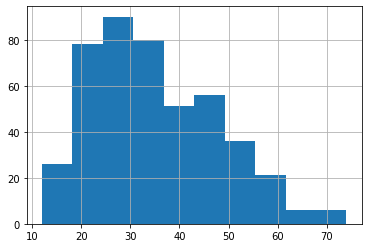

In [33]:
ciclistas["age"].hist()

In [34]:
# Dá para inserir os percentis manualmente e separar, como aqui,
# entre menor de idade, adulto e idoso
pd.qcut(ciclistas["age"], q=[0, .01, .98, 1]).value_counts()

(14.0, 62.04]     435
(62.04, 74.0]       9
(11.999, 14.0]      6
Name: age, dtype: int64

### Limpeza

#### Univariada (Método Tukey)

In [35]:
# Verificando idade

ciclistas["age"].describe()

count    450.000000
mean      35.015556
std       12.635801
min       12.000000
25%       25.000000
50%       32.000000
75%       44.000000
max       74.000000
Name: age, dtype: float64

In [36]:
# Não pode ter completado o ensino fundamental e ter 12 anos de idade,
# pedalar na rua há mais de 5 anos e ser pintor.
# Certamente é um dado discrepante.

ciclistas[ciclistas["age"] < 16]

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,schooling,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,faixa_etaria
90,15.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais e melhores infraestruturas adequadas (cic...,Não,Parda,10.0,Masculino,Estudante / Ajuda A Mãe No Trabalho,É mais rápido e prático,É mais rápido e prático,...,"Ensino Fundamental (primário e ginásio, até a ...",0.0,entre 1 e 2 anos,2.0,1.0,5.0,5.0,4.0,0.000000,jovem
125,15.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Sim,Branca,20.0,Masculino,Estudante,É mais barato,É mais rápido e prático,...,"Ensino Fundamental (primário e ginásio, até a ...",0.0,mais de 5 anos,5.0,2.0,7.0,7.0,0.0,0.000000,jovem
149,13.0,Falta de sinalização,Mais sinalização,Não,Parda,15.0,Masculino,Estudante,É mais rápido e prático,Outros,...,Sem instrução (nunca frequentou a escola ou pr...,0.0,entre 3 e 4 anos,3.0,0.0,0.0,3.0,0.0,0.000000,jovem
176,13.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Preta,5.0,Masculino,Estudante,É mais rápido e prático,É mais saudável,...,Sem instrução (nunca frequentou a escola ou pr...,0.0,mais de 5 anos,2.0,3.0,0.0,7.0,0.0,0.000000,jovem
247,14.0,Sem resposta,Mais segurança/educação no trânsito,Não,Branca,10.0,Masculino,Estudante,É mais barato,É mais rápido e prático,...,"Ensino Fundamental (primário e ginásio, até a ...",0.0,mais de 5 anos,1.0,1.0,5.0,7.0,0.0,0.000000,jovem
248,14.0,Falta de segurança no trânsito,Mais e melhores infraestruturas adequadas (cic...,Não,Branca,5.0,Masculino,Estudante,É mais rápido e prático,É mais rápido e prático,...,"Ensino Fundamental (primário e ginásio, até a ...",0.0,mais de 5 anos,3.0,0.0,0.0,3.0,0.0,0.000000,jovem
460,15.0,Falta de segurança pública,Mais e melhores infraestruturas adequadas (cic...,Não,Parda,5.0,Masculino,Estudante,É mais rápido e prático,É mais saudável,...,"Ensino Fundamental (primário e ginásio, até a ...",0.0,entre 1 e 2 anos,5.0,0.0,0.0,7.0,5.0,0.000000,jovem
462,12.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais e melhores infraestruturas adequadas (cic...,Não,Preta,15.0,Masculino,Pintor,É mais rápido e prático,Outros,...,"Ensino Fundamental (primário e ginásio, até a ...",1000.0,mais de 5 anos,4.0,3.0,0.0,7.0,5.0,0.066667,jovem
473,13.0,Falta de segurança pública,Mais sinalização,Não,Preta,30.0,Masculino,Estudante,Outros,Outros,...,"Ensino Fundamental (primário e ginásio, até a ...",20.0,entre 4 e 5 anos,1.0,1.0,0.0,6.0,6.0,0.001333,jovem


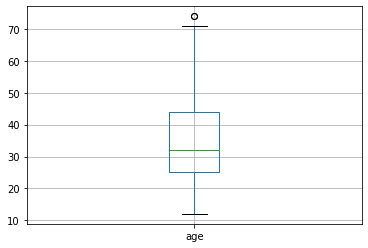

In [37]:
ciclistas.boxplot(column="age")

In [38]:
ciclistas = ciclistas[ciclistas["age"] > 12]
ciclistas["age"]

0      43.0
1      32.0
2      47.0
3      20.0
4      53.0
       ... 
470    51.0
472    31.0
473    13.0
474    26.0
475    18.0
Name: age, Length: 449, dtype: float64

In [39]:
# Se houvesse valor acima de 7, estaria errado, mas não há. segue o bonde

ciclistas["days_usage_total"].describe()

count    449.000000
mean       6.042316
std        1.260842
min        1.000000
25%        5.000000
50%        7.000000
75%        7.000000
max        7.000000
Name: days_usage_total, dtype: float64

In [40]:
# aparentemente de boa também. O valor 0 é dos estudantes

ciclistas["wage_standard"].describe()

count      449.000000
mean      1445.135857
std       1498.194777
min          0.000000
25%        937.000000
50%       1000.000000
75%       1500.000000
max      15000.000000
Name: wage_standard, dtype: float64

In [41]:
ciclistas["distance_time"].describe()

count    449.00000
mean      24.77951
std       13.88611
min        2.00000
25%       15.00000
50%       20.00000
75%       30.00000
max      120.00000
Name: distance_time, dtype: float64

In [42]:
# Pegando zscore de todas as colunas com números
zscore = (ciclistas.select_dtypes(include=[np.number])).apply(stats.zscore)

In [43]:
zscore.head(10)

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized
0,0.630172,-0.344578,0.370768,-0.358139,-0.993241,-0.544774,-0.827605,0.139346,0.370768
1,-0.243612,3.981107,0.370768,-0.358139,0.249002,-0.544774,-0.827605,0.139346,0.370768
2,0.947911,0.376370,-0.297446,-0.910732,2.733488,-0.544774,-0.033599,0.602801,-0.297446
3,-1.196831,-1.065525,-0.297446,2.957418,0.249002,1.881847,0.760406,0.139346,-0.297446
4,1.424521,0.376370,-0.330857,-0.910732,-0.372120,-0.544774,0.760406,1.066256,-0.330857
5,-0.879091,2.539212,-0.163803,-0.358139,1.491245,-0.544774,-0.827605,0.139346,-0.163803
6,1.424521,1.097317,0.805108,-0.358139,-0.372120,-0.544774,-0.827605,0.139346,0.805108
7,0.471302,-0.344578,-0.337539,0.194454,-0.993241,-0.544774,-0.827605,0.139346,-0.337539
8,-0.561352,0.015896,4.045948,-0.358139,0.249002,-0.544774,-0.827605,0.139346,4.045948
9,-0.879091,0.376370,-0.337539,-0.910732,-0.993241,0.425875,-1.621610,-0.324109,-0.337539


In [44]:
# Na idade, tem uns z-score limites ali no 3, mas não justifica removê-los como ouliers
zscore["age"].sort_values()

176   -1.752875
473   -1.752875
149   -1.752875
247   -1.673440
248   -1.673440
         ...   
269    2.695479
189    2.774914
67     2.854349
162    3.092653
108    3.092653
Name: age, Length: 449, dtype: float64

In [45]:
# Aqui, o z-score é mais discrepante, porém, observando outros gráficos,
# entende-se que é porque há uma distância do tempo de deslocamento
# dos usuários muito espalhada
# opto por ignorar.
zscore["distance_time"].sort_values()

81    -1.642283
250   -1.570188
46    -1.425999
283   -1.425999
286   -1.425999
         ...   
1      3.981107
108    4.702054
83     4.702054
294    4.702054
260    6.864896
Name: distance_time, Length: 449, dtype: float64

In [46]:
# Dá claramente para entender qual é aquele valor de 9 ali. É o cara que ganha 15k.
# Apesar de acreditar que não é mal preenchido, talvez valha a pena remover para não
# ficar tão discrepantes. Senão isso, pelo menos para o valor didático daqui do trabalho.

zscore["wage_standard"].sort_values()

475   -0.965661
56    -0.965661
443   -0.965661
129   -0.965661
438   -0.965661
         ...   
331    4.380055
299    5.048270
99     5.295509
250    5.716484
98     9.057557
Name: wage_standard, Length: 449, dtype: float64

In [47]:
ciclistas["wage_standard_zscore"] = zscore["wage_standard"]
ciclistas = ciclistas[ciclistas.wage_standard_zscore < 8]
ciclistas["wage_standard"].sort_values()

475        0.0
146        0.0
443        0.0
438        0.0
28         0.0
        ...   
258     8000.0
274     8000.0
299     9000.0
99      9370.0
250    10000.0
Name: wage_standard, Length: 448, dtype: float64

In [48]:
# Removido, mas é complicado usar esse método tendo ciência do quão
# inconsistentes são esses dados. Tanto é que ainda há valores muito
# discrepantes de z-score

stats.zscore(ciclistas["wage_standard"]).sort_values()

475   -1.044896
146   -1.044896
443   -1.044896
438   -1.044896
28    -1.044896
         ...   
258    4.863145
274    4.863145
299    5.601650
99     5.874897
250    6.340156
Name: wage_standard, Length: 448, dtype: float64

#### Bi e/ou Multivariada

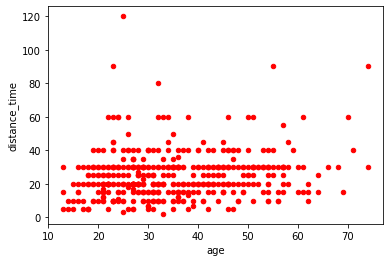

In [49]:
# É estranho o segundo mais velho estar empatado em segundo lugar pelo que mais pedala
ciclistas.plot.scatter(x="age", y="distance_time", color="red")

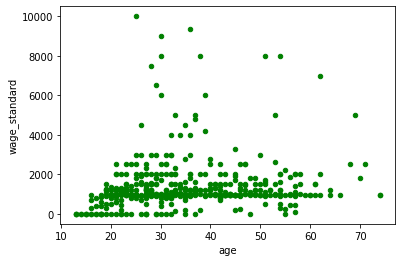

In [50]:
ciclistas.plot.scatter(x="age", y="wage_standard", color="green")

In [51]:
# Vamos detalhar para ver se o que anda 90min
# por dia é o mesmo que usa 7 dias por semana
ciclistas[ciclistas.age > 71][["age", "distance_time", "days_usage_total", "job"]]

# Não é. Ele usa 4 vezes por semana e é agricultor, o que pode justificar as longas distâncias. 

,age,distance_time,days_usage_total,job
108,74.0,90.0,4.0,Agricultor
162,74.0,30.0,7.0,Tecnico Em Cadeira De Escritorio


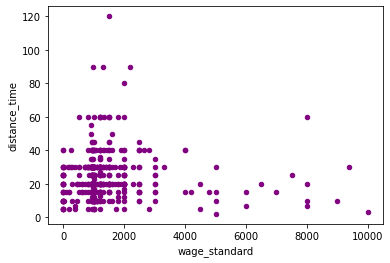

In [52]:
# Tudo aqui parece dentro da realidade, embora alguns números esparsos
ciclistas.plot.scatter(x="wage_standard", y="distance_time", color="purple")

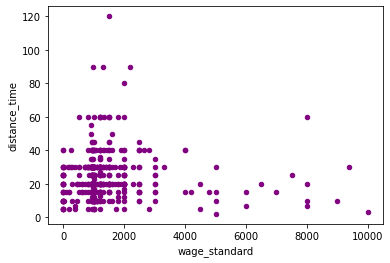

In [53]:
ciclistas.plot.scatter(x="wage_standard", y="distance_time", color="purple")

In [54]:
# Usando LocalOutlierFactor para detectar outliers como estratégia multivariada
cic_lof = ciclistas[["age", "wage_standard", "distance_time"]].copy()
clf = LocalOutlierFactor(n_neighbors=5)
scores = clf.fit_predict(cic_lof)

In [55]:
scores

array([ 1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [56]:
cic_lof2 = ciclistas[["age", "wage_standard", "distance_time"]].copy()
cic_lof2["scores"] = scores
cic_lof2

,age,wage_standard,distance_time,scores
0,43.0,2000.0,20.0,1
1,32.0,2000.0,80.0,-1
2,47.0,1000.0,30.0,1
3,20.0,1000.0,10.0,1
4,53.0,950.0,30.0,1
...,...,...,...,...
470,51.0,500.0,30.0,1
472,31.0,2500.0,20.0,1
473,13.0,20.0,30.0,-1
474,26.0,0.0,30.0,1


In [57]:
cic_lof2 = cic_lof2[cic_lof2["scores"] == 1]

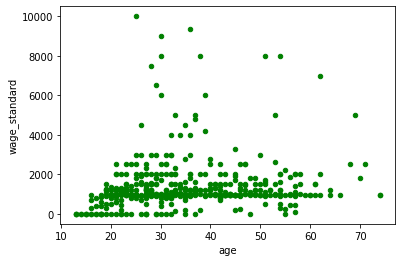

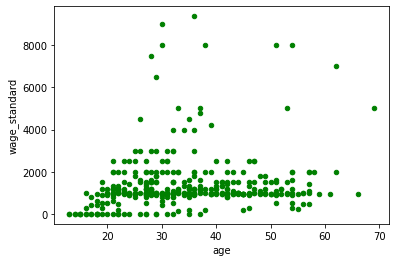

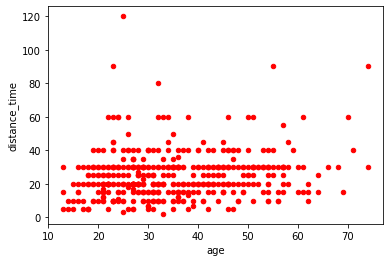

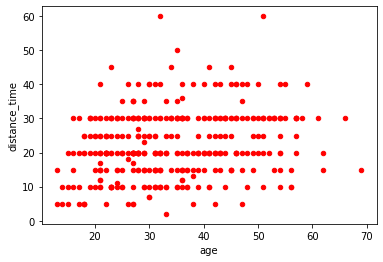

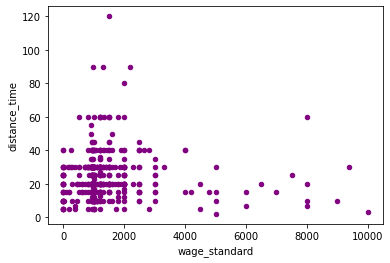

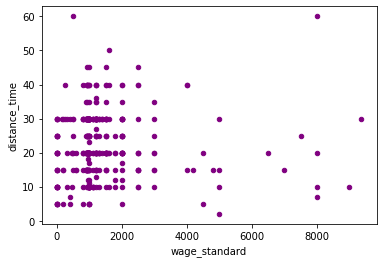

In [58]:
# Note que ele deu uma espalhada a mais nos gráficos e os valores se contém
# vamos deixar a mudança apenas nessa cópia mesmo, porque parece que esses
# valores são naturalmente caóticos mesmo

ciclistas.plot.scatter(x="age", y="wage_standard", color="green")
cic_lof2.plot.scatter(x="age", y="wage_standard", color="green")
ciclistas.plot.scatter(x="age", y="distance_time", color="red")
cic_lof2.plot.scatter(x="age", y="distance_time", color="red")
ciclistas.plot.scatter(x="wage_standard", y="distance_time", color="purple")
cic_lof2.plot.scatter(x="wage_standard", y="distance_time", color="purple")

# 3. Estatística Descritiva / Análise de Dados

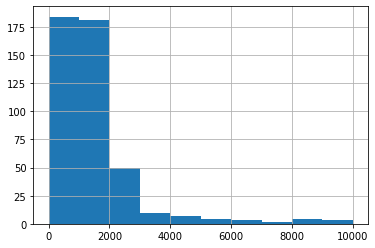

In [59]:
# Aqui, percebe-se que o grosso dos ciclistas ganha abaixo de 2000.
# E que, pela curva logarítmica, quanto maior o salário, menos pedala

ciclistas["wage_standard"].hist()

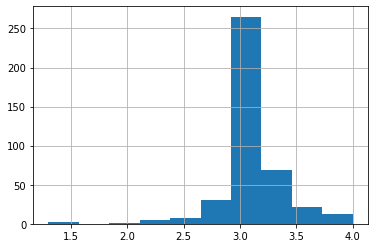

In [60]:
# Ao aplicar o log, vê-se melhor que
# o grosso dos ciclistas ganha entre 600 e 2000

log_wage = ciclistas['wage_standard'].apply(np.log10)
log_wage[log_wage > 0].hist()

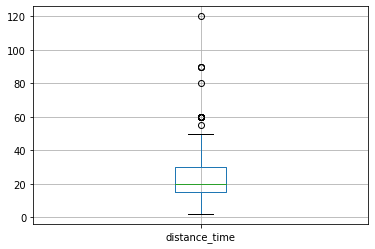

In [61]:
ciclistas.boxplot(column="distance_time")

In [62]:
ciclistas["wage_standard"].var()

1837652.7460650369

In [63]:
ciclistas["wage_standard"].mode()

0    1200.0
dtype: float64

In [64]:
ciclistas["distance_time"].describe()

count    448.000000
mean      24.801339
std       13.893919
min        2.000000
25%       15.000000
50%       20.000000
75%       30.000000
max      120.000000
Name: distance_time, dtype: float64

In [65]:
ciclistas["distance_time"].var()

193.04098254234583

In [66]:
ciclistas["distance_time"].mode()

0    30.0
dtype: float64

In [67]:
ciclistas.groupby(["gender"]).count()

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,...,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,faixa_etaria,wage_standard_zscore
gender,,,,,,,,,,,,,,,,,,,,,
Feminino,88,88,88,88,88,88,88,88,88,88,...,88,88,88,88,88,88,88,88,88,88
Masculino,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359
Outro,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [68]:
# 4.3 vezes mais ciclistas homens do que mulheres, embora haja mais mulheres que
# homens na cidade do Recife. O que depreendemos disso? Segurança? Lá embaixo
# vamos ver isso nas hipótese?

(ciclistas[ciclistas["gender"] == "Masculino"]["gender"].count())/(ciclistas[ciclistas["gender"] == "Feminino"]["gender"].count())

4.079545454545454

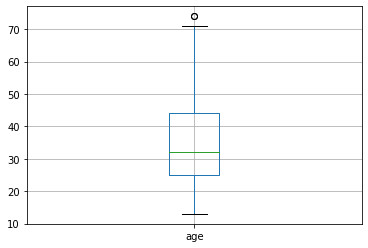

In [69]:
ciclistas.boxplot(column="age")

In [70]:
# Isso se sustenta ao observar a covariância negativa entre os dois

ciclistas.cov()

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,wage_standard_zscore
age,159.190137,28.040179,2.342196e+03,-0.826442,1.738674,-6.245526,1.296780,1.516119,0.156146,1.565089
distance_time,28.040179,193.040983,-4.780665e+02,-0.808475,1.008599,-3.948266,-1.208114,-0.153973,-0.031871,-0.319451
wage_standard,2342.196009,-478.066505,1.837653e+06,229.389162,128.436381,-145.890940,-34.574025,3.913491,122.510183,1227.946181
days_usage_leisure,-0.826442,-0.808475,2.293892e+02,3.289210,0.717701,0.603468,0.293185,-0.811741,0.015293,0.153281
days_usage_school,1.738674,1.008599,1.284364e+02,0.717701,2.590744,0.218680,0.496924,0.208473,0.008562,0.085823
days_usage_shopping,-6.245526,-3.948266,-1.458909e+02,0.603468,0.218680,4.261745,0.135347,-0.755593,-0.009726,-0.097486
days_usage_total,1.296780,-1.208114,-3.457403e+01,0.293185,0.496924,0.135347,1.590844,1.292625,-0.002305,-0.023103
days_usage_working,1.516119,-0.153973,3.913491e+00,-0.811741,0.208473,-0.755593,1.292625,4.627017,0.000261,0.002615
wage_standard_normalized,0.156146,-0.031871,1.225102e+02,0.015293,0.008562,-0.009726,-0.002305,0.000261,0.008167,0.081863
wage_standard_zscore,1.565089,-0.319451,1.227946e+03,0.153281,0.085823,-0.097486,-0.023103,0.002615,0.081863,0.820531


In [71]:
ciclistas.corr(method="pearson")

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,wage_standard_zscore
age,1.000000,0.159955,0.136941,-0.036117,0.085615,-0.239782,0.081488,0.055863,0.136941,0.136941
distance_time,0.159955,1.000000,-0.025382,-0.032085,0.045101,-0.137654,-0.068940,-0.005152,-0.025382,-0.025382
wage_standard,0.136941,-0.025382,1.000000,0.093303,0.058863,-0.052132,-0.020221,0.001342,1.000000,1.000000
days_usage_leisure,-0.036117,-0.032085,0.093303,1.000000,0.245859,0.161181,0.128169,-0.208076,0.093303,0.093303
days_usage_school,0.085615,0.045101,0.058863,0.245859,1.000000,0.065812,0.244773,0.060213,0.058863,0.058863
days_usage_shopping,-0.239782,-0.137654,-0.052132,0.161181,0.065812,1.000000,0.051980,-0.170155,-0.052132,-0.052132
days_usage_total,0.081488,-0.068940,-0.020221,0.128169,0.244773,0.051980,1.000000,0.476440,-0.020221,-0.020221
days_usage_working,0.055863,-0.005152,0.001342,-0.208076,0.060213,-0.170155,0.476440,1.000000,0.001342,0.001342
wage_standard_normalized,0.136941,-0.025382,1.000000,0.093303,0.058863,-0.052132,-0.020221,0.001342,1.000000,1.000000
wage_standard_zscore,0.136941,-0.025382,1.000000,0.093303,0.058863,-0.052132,-0.020221,0.001342,1.000000,1.000000


In [72]:
ciclistas.corr(method="spearman")

,age,distance_time,wage_standard,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,wage_standard_zscore
age,1.000000,0.159422,0.206498,-0.055803,0.039770,-0.245315,0.073314,0.094396,0.206498,0.206498
distance_time,0.159422,1.000000,0.069630,0.004614,0.073528,-0.143175,-0.080991,-0.021467,0.069630,0.069630
wage_standard,0.206498,0.069630,1.000000,0.012152,0.093206,-0.075330,0.016760,0.041924,1.000000,1.000000
days_usage_leisure,-0.055803,0.004614,0.012152,1.000000,0.216540,0.169125,0.110763,-0.226121,0.012152,0.012152
days_usage_school,0.039770,0.073528,0.093206,0.216540,1.000000,0.065189,0.227233,0.040871,0.093206,0.093206
days_usage_shopping,-0.245315,-0.143175,-0.075330,0.169125,0.065189,1.000000,0.034218,-0.170773,-0.075330,-0.075330
days_usage_total,0.073314,-0.080991,0.016760,0.110763,0.227233,0.034218,1.000000,0.429627,0.016760,0.016760
days_usage_working,0.094396,-0.021467,0.041924,-0.226121,0.040871,-0.170773,0.429627,1.000000,0.041924,0.041924
wage_standard_normalized,0.206498,0.069630,1.000000,0.012152,0.093206,-0.075330,0.016760,0.041924,1.000000,1.000000
wage_standard_zscore,0.206498,0.069630,1.000000,0.012152,0.093206,-0.075330,0.016760,0.041924,1.000000,1.000000


## Testes de hipótese

In [73]:
from scipy import stats

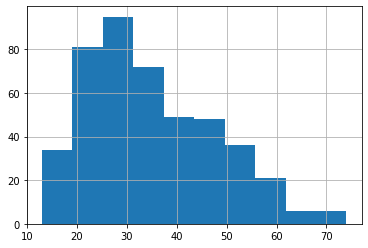

In [74]:
ciclistas["age"].hist()

In [75]:
stats.shapiro(ciclistas['age'])

ShapiroResult(statistic=0.961276650428772, pvalue=1.7779739902579195e-09)

In [76]:
# uma hipotese pode ser que mulheres nao usam bike por inseguranca

ciclistas[ciclistas["gender"]=="Feminino"].groupby(["biggest_need"]).count()

,age,biggest_issue,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,...,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,faixa_etaria,wage_standard_zscore
biggest_need,,,,,,,,,,,,,,,,,,,,,
"Mais e melhores infraestruturas adequadas (ciclovias, bicicletários, etc.)",51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
Mais segurança pública,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Mais segurança/educação no trânsito,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
Mais sinalização,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Outros,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
# uma hipotese pode ser que mulheres nao usam bike por inseguranca

ciclistas[ciclistas["gender"]=="Masculino"].groupby(["biggest_need"]).count()

,age,biggest_issue,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,neighborhood_destiny,...,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,faixa_etaria,wage_standard_zscore
biggest_need,,,,,,,,,,,,,,,,,,,,,
"Mais e melhores infraestruturas adequadas (ciclovias, bicicletários, etc.)",196,196,196,196,196,196,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196
Mais segurança pública,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Mais segurança/educação no trânsito,118,118,118,118,118,118,118,118,118,118,...,118,118,118,118,118,118,118,118,118,118
Mais sinalização,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Outros,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


# 4. Teste de Hipótese

In [78]:
#Visão geral dos Dados
ciclistas.head()

,age,biggest_issue,biggest_need,collisions,color_race,distance_time,gender,job,motivation_to_continue,motivation_to_start,...,wage_standard,years_using,days_usage_leisure,days_usage_school,days_usage_shopping,days_usage_total,days_usage_working,wage_standard_normalized,faixa_etaria,wage_standard_zscore
0,43.0,"Falta de infraestrutura adequada (ciclovias, b...",Mais segurança/educação no trânsito,Não,Branca,20.0,Masculino,Encanador,É mais rápido e prático,É mais rápido e prático,...,2000.0,entre 4 e 5 anos,1.0,0.0,0.0,5.0,5.0,0.133333,meia_idade,0.370768
1,32.0,Falta de segurança no trânsito,Mais segurança pública,Sim,Parda,80.0,Masculino,Vendedor(a),É mais rápido e prático,É mais barato,...,2000.0,entre 4 e 5 anos,1.0,2.0,0.0,5.0,5.0,0.133333,adulto,0.370768
2,47.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Branca,30.0,Masculino,Vendedor Ambulante,É mais barato,É mais barato,...,1000.0,entre 1 e 2 anos,0.0,6.0,0.0,6.0,6.0,0.066667,idoso,-0.297446
3,20.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Parda,10.0,Masculino,Soldado Do Exército,É mais rápido e prático,É mais rápido e prático,...,1000.0,mais de 5 anos,7.0,2.0,5.0,7.0,5.0,0.066667,jovem,-0.297446
4,53.0,Falta de segurança no trânsito,Mais segurança/educação no trânsito,Não,Preta,30.0,Masculino,Pedreiro / Pintor,É mais rápido e prático,É mais rápido e prático,...,950.0,mais de 5 anos,0.0,1.0,0.0,7.0,7.0,0.063333,idoso,-0.330857


In [ ]:
#Possiveis relações
# As pessoas de baixa renda, independente da idade, são as que mais 